In [1]:
# importar hdfs y pandas
from hdfs import InsecureClient
import pandas as pd

#Creamos una conexión
client = InsecureClient('http://localhost:9870', user='usuarioFAI')

#leemos el archivo lakes
with client.read('/cursoFAI/my_dataset/partitions/rivers.csv') as reader:
            df=pd.read_csv(reader,dtype={'Locator': 'string'})
df.head()

,Unnamed: 0,Sample_ID,Collect_DateTime,Depth_(m),Site_Type,Area,Locator,Site,Parameter,Value,Units,SiteName,Latitude,Longitude,New_Georeferenced_Column
0,0,17625,01/14/1998 12:48:00 PM,NaN,Streams and Rivers,Cedar,A438,Cedar River at SE Jones Rd,Storm Or Non-Storm,NaN,none,Cedar River at SE Jones Rd,47.4579,-122.0783,POINT (-122.0783056 47.45794444)
1,1,11621,03/15/1984 12:00:00 AM,1.0,Streams and Rivers,Cedar,A438,Cedar River at SE Jones Rd,Conductivity,50.0000,umhos/cm,Cedar River at SE Jones Rd,47.4579,-122.0783,POINT (-122.0783056 47.45794444)
2,2,8312,03/08/1977 12:00:00 AM,1.0,Streams and Rivers,Cedar,A438,Cedar River at SE Jones Rd,Nitrite + Nitrate Nitrogen,0.5150,mg/L,Cedar River at SE Jones Rd,47.4579,-122.0783,POINT (-122.0783056 47.45794444)
3,3,13654,09/16/1987 12:00:00 AM,1.0,Streams and Rivers,Cedar,A438,Cedar River at SE Jones Rd,Total Phosphorus,0.0130,mg/L,Cedar River at SE Jones Rd,47.4579,-122.0783,POINT (-122.0783056 47.45794444)
4,4,34581,01/13/2016 12:25:00 PM,NaN,Streams and Rivers,Cedar,A438,Cedar River at SE Jones Rd,Ammonia Nitrogen,0.0038,mg/L,Cedar River at SE Jones Rd,47.4579,-122.0783,POINT (-122.0783056 47.45794444)


In [2]:
#dropeamos la columna unnamed:
df=df.drop(columns='Unnamed: 0')

Text(0.5, 0, 'Cantidad de entradas')

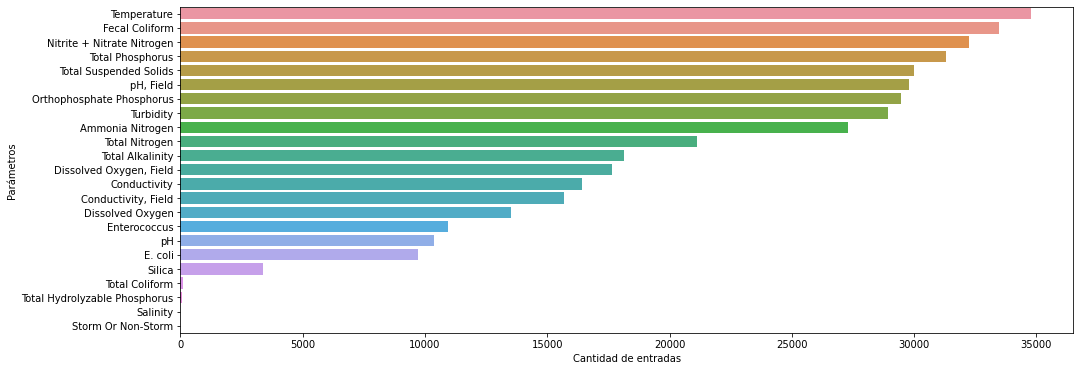

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data=df.groupby('Parameter').Value.count().sort_values(ascending=False)

plt.figure(figsize=(16,6))
sns.barplot(y=data.index, x=data, orient='h')
plt.ylabel("Parámetros")
plt.xlabel("Cantidad de entradas")


In [4]:
data

Parameter
Temperature                      34772
Fecal Coliform                   33482
Nitrite + Nitrate Nitrogen       32247
Total Phosphorus                 31296
Total Suspended Solids           29998
pH, Field                        29802
Orthophosphate Phosphorus        29453
Turbidity                        28938
Ammonia Nitrogen                 27283
Total Nitrogen                   21134
Total Alkalinity                 18155
Dissolved Oxygen, Field          17647
Conductivity                     16420
Conductivity, Field              15689
Dissolved Oxygen                 13504
Enterococcus                     10937
pH                               10350
E. coli                           9709
Silica                            3395
Total Coliform                     115
Total Hydrolyzable Phosphorus       79
Salinity                             0
Storm Or Non-Storm                   0
Name: Value, dtype: int64

In [5]:
#para verificar que sean todos nulos realizamos esto
df.loc[((df['Parameter']=='Storm Or Non-Storm')|(df['Parameter']=='Salinity'))&(df['Value'].notnull()),['Parameter', 'Value', 'Units']]

,Parameter,Value,Units


In [6]:
#primero obtenemos los índices de las filas que tienen ese parámetro
index_names = df[df['Parameter'] == 'Storm Or Non-Storm' ].index
index_names=index_names.append(df[df['Parameter'] == 'Salinity' ].index)
index_names=index_names.append(df[df['Parameter'] == 'Total Hydrolyzable Phosphorus' ].index)
#ahora dropeamos del df todas las rows 
df.drop(index_names, inplace = True)
df.groupby('Parameter').Value.count().sort_values(ascending=False)

Parameter
Temperature                   34772
Fecal Coliform                33482
Nitrite + Nitrate Nitrogen    32247
Total Phosphorus              31296
Total Suspended Solids        29998
pH, Field                     29802
Orthophosphate Phosphorus     29453
Turbidity                     28938
Ammonia Nitrogen              27283
Total Nitrogen                21134
Total Alkalinity              18155
Dissolved Oxygen, Field       17647
Conductivity                  16420
Conductivity, Field           15689
Dissolved Oxygen              13504
Enterococcus                  10937
pH                            10350
E. coli                        9709
Silica                         3395
Total Coliform                  115
Name: Value, dtype: int64

In [7]:
#cantidad de areas
df.Area.unique()

array(['Cedar', 'Green', 'Rock', 'McAleer', 'Springbrook/Black River',
       'Little Soos', 'Jenkins', 'Sammamish', 'Newaukum', 'Mileta',
       'Laughing Jacobs', 'Swamp', 'Snoqualmie', 'Kelsey', 'Bear', 'Coal',
       'Lewis', 'Crisp', 'Pipers', 'Little Bear', 'Evans', 'Covington',
       'Duwamish', 'Idylwood', 'Issaquah', 'Soos', 'May', 'North', 'Judd',
       'Thornton', 'Griffin Creek', 'Cochran Springs',
       'Snoqualmie - North Fork', 'Cottage Lake Creek', 'Longfellow',
       'Pine Lake', 'Skykomish', 'Ebright', 'Venema', 'Fisher', 'Mill',
       'Eden', 'Ames Creek', 'Ravensdale', 'Forbes', 'Lyon',
       'Fairweather', 'Tibbetts', 'Snoqualmie - South Fork', 'Tahlequah',
       'Yarrow', 'Cherry Creek', 'Juanita', 'Shinglemill',
       'Patterson Creek', 'Tolt River', 'Boise', 'Harris Creek',
       'Snoqualmie - Middle Fork', 'Gorsuch', 'Raging River', 'Zackuse',
       'Christensen'], dtype=object)

Text(0.5, 0, 'Cantidad de entradas')

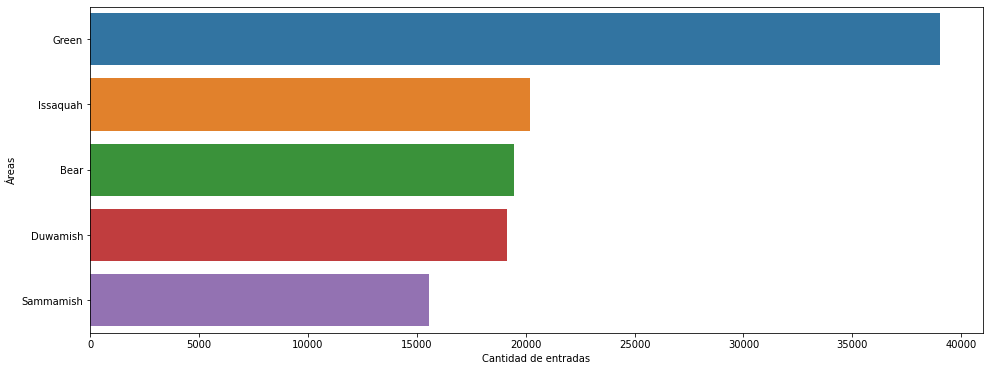

In [8]:

data=df.Area.value_counts().sort_values(ascending=False).nlargest(5)

plt.figure(figsize=(16,6))
sns.barplot(y=data.index, x=data, orient='h')
plt.ylabel("Áreas")
plt.xlabel("Cantidad de entradas")

In [9]:
df.Area.value_counts().sort_values(ascending=False).nlargest(5)

Green        39040
Issaquah     20184
Bear         19468
Duwamish     19121
Sammamish    15579
Name: Area, dtype: int64

Text(0.5, 1.0, 'Locators del Área Green')

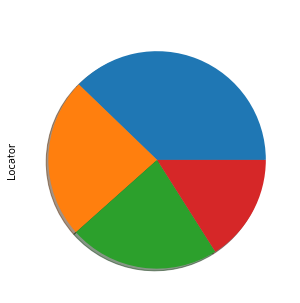

In [10]:
locators_green=df.groupby('Area').get_group('Green').Locator.value_counts()

locators_green.plot.pie(figsize=(5, 5),textprops={'color':"w"}, shadow=True).set_title('Locators del Área Green', {'color':'w','fontsize':14})


Text(0.5, 1.0, 'Locators del Área Issaquah')

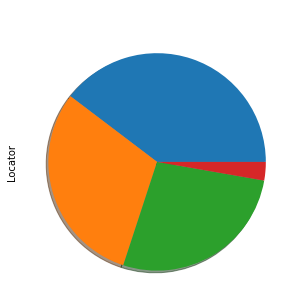

In [11]:
locators_issa=df.groupby('Area').get_group('Issaquah').Locator.value_counts()

locators_issa.plot.pie(figsize=(5, 5),textprops={'color':"w"}, shadow=True).set_title('Locators del Área Issaquah', {'color':'w','fontsize':14})

In [12]:
locators_green

3106    14753
0311     9292
B319     8746
A319     6249
Name: Locator, dtype: Int64

In [13]:
locators_issa

0631    8008
A631    6113
A632    5508
0632     555
Name: Locator, dtype: Int64

Text(0, 0.5, 'Cantidad de entradas')

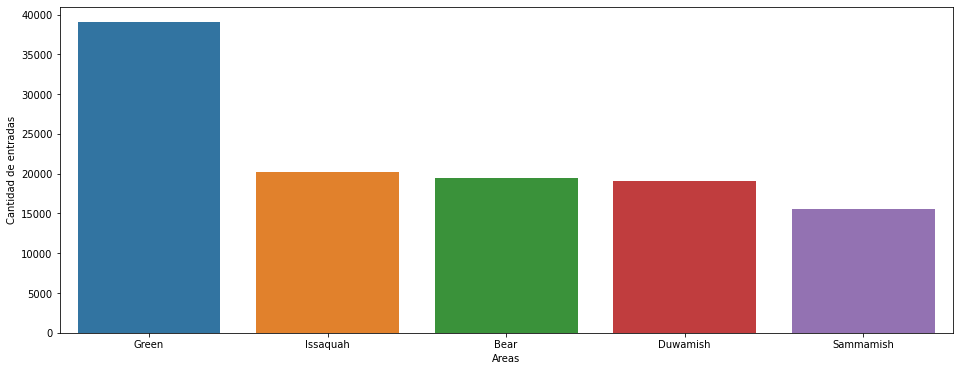

In [14]:
#graficamos los mejores 5
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data=df.groupby('Area').Parameter.count().sort_values(ascending=False).nlargest(5)

plt.figure(figsize=(16,6))
sns.barplot(x=data.index, y=data)
plt.xlabel("Areas")
plt.ylabel("Cantidad de entradas")

In [15]:
#chequeemos si Green e Issaquah tienen más de un Locator
df.loc[(df['Area']=='Green')|(df['Area']=='Issaquah')].groupby('Area').Locator.unique()

Area
Green       [3106, A319, 0311, B319]
Issaquah    [A631, A632, 0631, 0632]
Name: Locator, dtype: object

In [16]:
#Nos quedamos con las Areas de Green e Issaquah
df_areas=df.loc[(df['Area']=='Green')|(df['Area']=='Issaquah')]
df_areas

,Sample_ID,Collect_DateTime,Depth_(m),Site_Type,Area,Locator,Site,Parameter,Value,Units,SiteName,Latitude,Longitude,New_Georeferenced_Column
7583,20984,07/18/1995 01:05:00 PM,NaN,Streams and Rivers,Green,3106,Green River at Starfire Way,Turbidity,1.7000,NTU,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
7584,27263,02/15/2006 10:14:00 AM,NaN,Streams and Rivers,Green,3106,Green River at Starfire Way,"Dissolved Oxygen, Field",10.3000,mg/L,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
7585,9410,03/24/1980 12:00:00 AM,1.0,Streams and Rivers,Green,3106,Green River at Starfire Way,Total Suspended Solids,12.3000,mg/L,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
7586,11974,11/06/1984 12:00:00 AM,1.0,Streams and Rivers,Green,3106,Green River at Starfire Way,Temperature,7.9000,deg C,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
7587,12501,10/08/1985 12:00:00 AM,1.0,Streams and Rivers,Green,3106,Green River at Starfire Way,pH,7.1000,pH,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443429,35946,07/11/2017 12:32:00 PM,NaN,Streams and Rivers,Issaquah,0632,Issaquah North Fork at mouth,"Conductivity, Field",204.0000,umhos/cm,Issaquah North Fork at mouth,47.5502,-122.046,POINT (-122.046 47.5502)
443430,156820,07/17/2018 12:48:00 PM,NaN,Streams and Rivers,Issaquah,0632,Issaquah North Fork at mouth,Total Nitrogen,0.3790,mg/L,Issaquah North Fork at mouth,47.5502,-122.046,POINT (-122.046 47.5502)
443431,144353,11/14/2017 12:19:00 PM,NaN,Streams and Rivers,Issaquah,0632,Issaquah North Fork at mouth,"Conductivity, Field",121.0000,umhos/cm,Issaquah North Fork at mouth,47.5502,-122.046,POINT (-122.046 47.5502)
443432,183030,09/10/2019 09:59:00 AM,NaN,Streams and Rivers,Issaquah,0632,Issaquah North Fork at mouth,Nitrite + Nitrate Nitrogen,0.0889,mg/L,Issaquah North Fork at mouth,47.5502,-122.046,POINT (-122.046 47.5502)


In [17]:
#separamos los dos dataframes
df_green=df.loc[(df['Area']=='Green')]
df_issa=df.loc[(df['Area']=='Issaquah')]

In [18]:
#trabajemos con green
#hay duplicados? para chequear realizamos la siguiente operación, si nos aparece un True es que hay duplicados
df_green.duplicated(subset=['Sample_ID','Collect_DateTime', 'Locator', 'Parameter', 'Value']).unique()

array([False])

Text(0, 0.5, 'Cantidad de entradas')

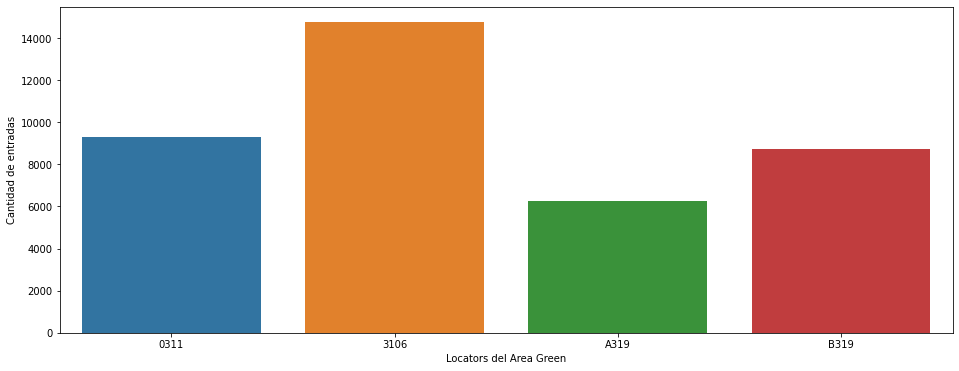

In [19]:
#graficamente
data=df_green.groupby('Locator').Parameter.count()

plt.figure(figsize=(16,6))
sns.barplot(x=data.index, y=data)
plt.xlabel("Locators del Area Green")
plt.ylabel("Cantidad de entradas")

In [20]:
df_green.groupby('Parameter').Value.count().sort_values(ascending=False)

Parameter
Temperature                   3590
Nitrite + Nitrate Nitrogen    3458
Fecal Coliform                3393
pH, Field                     3159
Total Phosphorus              3136
Ammonia Nitrogen              3048
Orthophosphate Phosphorus     2669
Total Suspended Solids        2347
Turbidity                     2257
Dissolved Oxygen              2075
pH                            1841
Conductivity                  1602
Total Nitrogen                1297
Total Alkalinity              1089
Dissolved Oxygen, Field       1056
Conductivity, Field            945
Enterococcus                   812
E. coli                        595
Silica                          67
Name: Value, dtype: int64

In [20]:
#veamos de que tiene más parámetros el locator 3106
df_3106=df_green.loc[df_green['Locator']=='3106']
df_3106.groupby('Parameter').Value.count().sort_values(ascending=False)

Parameter
Temperature                   1465
Fecal Coliform                1421
Nitrite + Nitrate Nitrogen    1404
Ammonia Nitrogen              1394
pH, Field                     1282
Total Phosphorus              1266
Orthophosphate Phosphorus     1146
Dissolved Oxygen               941
pH                             863
Total Suspended Solids         683
Turbidity                      655
Conductivity                   459
Total Nitrogen                 385
Dissolved Oxygen, Field        314
Total Alkalinity               313
Conductivity, Field            300
Enterococcus                   229
E. coli                        155
Silica                          30
Name: Value, dtype: int64

Text(0, 0.5, 'Cantidad de entradas')

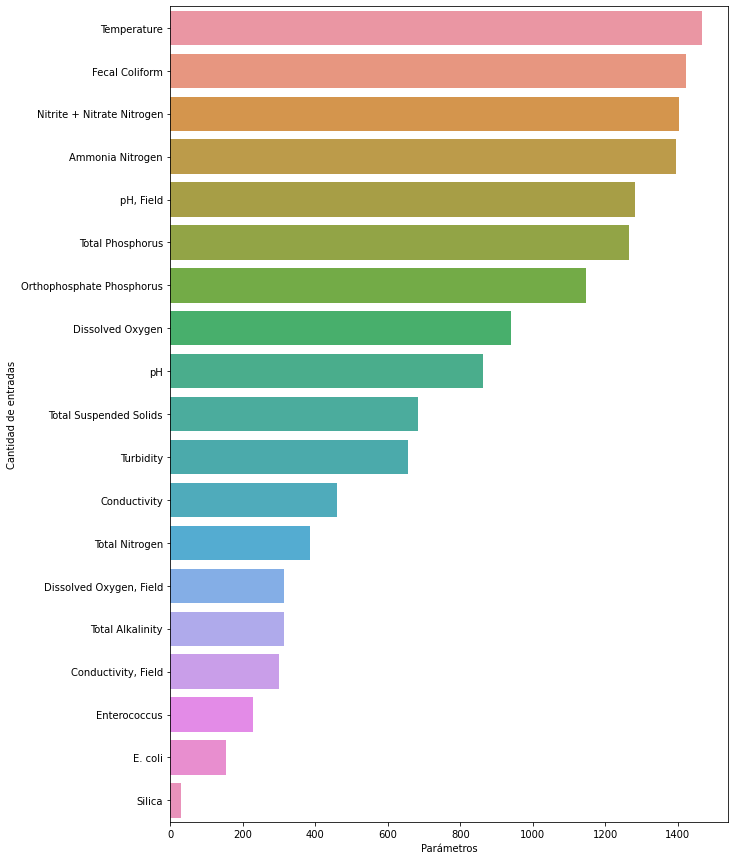

In [21]:
#graficamente
data=df_3106.groupby('Parameter').Value.count().sort_values(ascending=False)

plt.figure(figsize=(10,15))
sns.barplot(y=data.index, x=data, orient='h')
plt.xlabel("Parámetros")
plt.ylabel("Cantidad de entradas")

In [29]:
df_3106

,Sample_ID,Collect_DateTime,Depth_(m),Site_Type,Area,Locator,Site,Parameter,Value,Units,SiteName,Latitude,Longitude,New_Georeferenced_Column
7583,20984,07/18/1995 01:05:00 PM,NaN,Streams and Rivers,Green,3106,Green River at Starfire Way,Turbidity,1.7000,NTU,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
7584,27263,02/15/2006 10:14:00 AM,NaN,Streams and Rivers,Green,3106,Green River at Starfire Way,"Dissolved Oxygen, Field",10.3000,mg/L,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
7585,9410,03/24/1980 12:00:00 AM,1.0,Streams and Rivers,Green,3106,Green River at Starfire Way,Total Suspended Solids,12.3000,mg/L,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
7586,11974,11/06/1984 12:00:00 AM,1.0,Streams and Rivers,Green,3106,Green River at Starfire Way,Temperature,7.9000,deg C,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
7587,12501,10/08/1985 12:00:00 AM,1.0,Streams and Rivers,Green,3106,Green River at Starfire Way,pH,7.1000,pH,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23151,13818,11/24/1987 12:00:00 AM,1.0,Streams and Rivers,Green,3106,Green River at Starfire Way,Ammonia Nitrogen,0.0740,mg/L,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
23153,13792,11/10/1987 12:00:00 AM,1.0,Streams and Rivers,Green,3106,Green River at Starfire Way,Dissolved Oxygen,8.7500,mg/L,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
23154,12214,03/21/1985 12:00:00 AM,1.0,Streams and Rivers,Green,3106,Green River at Starfire Way,Total Suspended Solids,8.0000,mg/L,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
23155,13670,08/17/1987 12:00:00 AM,1.0,Streams and Rivers,Green,3106,Green River at Starfire Way,Fecal Coliform,200.0000,ORG/100ml,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)


In [22]:
df_3106_pivoted=df_3106.pivot(index=('Sample_ID','Collect_DateTime'),columns='Parameter', values='Value')
df_3106_pivoted

,Parameter,Ammonia Nitrogen,Conductivity,"Conductivity, Field",Dissolved Oxygen,"Dissolved Oxygen, Field",E. coli,Enterococcus,Fecal Coliform,Nitrite + Nitrate Nitrogen,Orthophosphate Phosphorus,Silica,Temperature,Total Alkalinity,Total Nitrogen,Total Phosphorus,Total Suspended Solids,Turbidity,pH,"pH, Field"
Sample_ID,Collect_DateTime,,,,,,,,,,,,,,,,,,,
5744,04/12/2017 08:22:00 AM,0.0203,NaN,84.6,NaN,10.60,NaN,NaN,40.0,0.379,0.0128,NaN,9.3,25.8,0.490,0.0292,5.80,5.59,NaN,7.47
7303,10/15/1970 12:00:00 AM,0.1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7304,10/15/1970 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5400.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7307,10/29/1970 12:00:00 AM,0.0900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160,NaN,NaN,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7310,11/12/1970 12:00:00 AM,0.1000,NaN,NaN,NaN,NaN,NaN,NaN,850.0,0.410,NaN,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191455,06/10/2020 08:50:00 AM,0.0138,NaN,69.3,NaN,10.30,NaN,NaN,150.0,0.171,0.0127,14.3,12.3,27.1,0.286,0.0327,4.70,2.87,NaN,7.39
192133,07/15/2020 09:48:00 AM,0.0639,NaN,147.0,NaN,8.37,NaN,NaN,24.0,0.286,0.0280,16.5,16.7,44.9,0.429,0.0643,2.00,1.97,NaN,7.02
192820,08/12/2020 09:04:00 AM,0.0310,NaN,159.0,NaN,7.70,NaN,NaN,37.0,0.229,0.0255,14.2,17.8,50.0,0.381,0.0702,4.32,2.42,NaN,6.95


In [39]:
#creamos un csv de este locator
df_3106_pivoted.to_csv(r'/home/usuarioFAI/datasets/my_dataset/partitions/r_green_3106.csv')

In [40]:
#vamos a subir a hdfs
# importar hdfs

dir_archivo="/home/usuarioFAI/datasets/my_dataset/partitions/r_green_3106.csv"
dir_destino="/cursoFAI/my_dataset/partitions/r_green_3106.csv"
subir = client.upload(dir_destino,dir_archivo)

In [23]:
#además crearemos un archivo del río Green y uno del río ISSA
df_green_pivoted=df_green.pivot(index=('Sample_ID','Collect_DateTime'),columns='Parameter', values='Value')
df_green_pivoted

,Parameter,Ammonia Nitrogen,Conductivity,"Conductivity, Field",Dissolved Oxygen,"Dissolved Oxygen, Field",E. coli,Enterococcus,Fecal Coliform,Nitrite + Nitrate Nitrogen,Orthophosphate Phosphorus,Silica,Temperature,Total Alkalinity,Total Nitrogen,Total Phosphorus,Total Suspended Solids,Turbidity,pH,"pH, Field"
Sample_ID,Collect_DateTime,,,,,,,,,,,,,,,,,,,
5721,04/12/2017 10:21:00 AM,0.0100,NaN,58.7,NaN,11.30,NaN,NaN,17.0,0.336,0.00699,NaN,8.2,20.3,0.440,0.0208,4.2,2.90,NaN,7.41
5744,04/12/2017 08:22:00 AM,0.0203,NaN,84.6,NaN,10.60,NaN,NaN,40.0,0.379,0.01280,NaN,9.3,25.8,0.490,0.0292,5.8,5.59,NaN,7.47
5776,04/12/2017 11:35:00 AM,0.0038,NaN,47.4,NaN,12.00,NaN,NaN,1.0,0.236,0.00424,NaN,8.0,16.4,0.301,0.0131,2.6,1.72,NaN,7.65
5779,04/12/2017 08:13:00 AM,0.0283,NaN,84.4,NaN,10.60,NaN,NaN,37.0,0.386,0.01460,NaN,9.2,25.7,0.500,0.0327,5.4,4.08,NaN,7.44
7278,01/22/1970 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193429,09/28/2020 10:43:00 AM,0.0047,NaN,58.7,NaN,10.80,NaN,NaN,18.0,0.211,0.00328,NaN,13.7,22.4,0.319,0.0152,3.3,1.88,NaN,7.80
193944,10/14/2020 09:37:00 AM,0.0164,NaN,91.0,NaN,9.53,NaN,NaN,97.0,0.273,0.02360,NaN,13.2,32.6,0.479,0.0532,5.4,3.70,NaN,7.38
193969,10/14/2020 10:18:00 AM,0.0029,NaN,56.6,NaN,11.20,NaN,NaN,17.0,0.208,0.00160,NaN,12.6,21.4,0.292,NaN,1.7,1.89,NaN,7.74


In [24]:
#además crearemos un archivo del río Green y uno del río ISSA
df_issa_pivoted=df_issa.pivot(index=('Sample_ID','Collect_DateTime'),columns='Parameter', values='Value')
df_issa_pivoted

,Parameter,Ammonia Nitrogen,Conductivity,"Conductivity, Field",Dissolved Oxygen,"Dissolved Oxygen, Field",E. coli,Enterococcus,Fecal Coliform,Nitrite + Nitrate Nitrogen,Orthophosphate Phosphorus,Silica,Temperature,Total Alkalinity,Total Nitrogen,Total Phosphorus,Total Suspended Solids,Turbidity,pH,"pH, Field"
Sample_ID,Collect_DateTime,,,,,,,,,,,,,,,,,,,
5725,04/11/2017 12:40:00 PM,0.0151,NaN,94.3,NaN,11.70,NaN,NaN,5.0,0.6780,0.00848,15.9,8.6,34.8,0.861,0.0222,3.6,2.14,NaN,7.41
5752,04/11/2017 12:26:00 PM,0.0056,NaN,128.0,NaN,11.10,NaN,NaN,1.0,0.1180,0.00868,NaN,10.0,47.5,0.336,0.0279,2.0,1.70,NaN,7.36
5771,04/11/2017 12:12:00 PM,0.0050,NaN,92.6,NaN,11.60,NaN,NaN,7.0,0.7640,0.00725,NaN,8.8,32.9,0.938,0.0239,3.2,2.46,NaN,7.41
7415,01/04/1972 12:00:00 AM,0.0100,79.0,NaN,12.8,NaN,NaN,NaN,NaN,0.1400,NaN,NaN,4.2,24.0,NaN,NaN,26.0,2.60,6.3,6.30
7416,01/04/1972 12:00:00 AM,0.0100,65.0,NaN,12.0,NaN,NaN,NaN,NaN,0.1600,NaN,NaN,2.5,17.0,NaN,NaN,5.0,2.50,7.0,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193409,09/30/2020 12:51:00 PM,0.0186,NaN,206.0,NaN,8.88,NaN,NaN,79.0,0.0483,0.02460,NaN,14.5,76.8,0.316,0.0577,0.5,1.25,NaN,7.38
193424,09/30/2020 12:28:00 PM,0.0086,NaN,151.0,NaN,10.90,NaN,NaN,86.0,0.5300,0.01290,NaN,12.7,59.6,0.619,0.0277,0.9,1.07,NaN,7.53
193953,10/12/2020 01:29:00 PM,0.0070,NaN,114.0,NaN,10.60,NaN,NaN,170.0,0.7090,0.01150,NaN,12.4,42.7,0.889,0.0350,3.6,3.03,NaN,7.37


In [25]:
#creamos un csv de cada área
df_green_pivoted.to_csv(r'/home/usuarioFAI/datasets/my_dataset/partitions/r_green.csv')
df_issa_pivoted.to_csv(r'/home/usuarioFAI/datasets/my_dataset/partitions/r_issa.csv')

In [26]:
#vamos a subirlos a hdfs

dir_archivo="/home/usuarioFAI/datasets/my_dataset/partitions/r_green.csv"
dir_destino="/cursoFAI/my_dataset/partitions/r_green.csv"
subir = client.upload(dir_destino,dir_archivo)
dir_archivo="/home/usuarioFAI/datasets/my_dataset/partitions/r_issa.csv"
dir_destino="/cursoFAI/my_dataset/partitions/r_issa.csv"
subir = client.upload(dir_destino,dir_archivo)